In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp
import decimal
import random
#decimal.getcontext().prec = 4
%matplotlib inline

In [2]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [2]:
def variation(array,n):
    indicies = [random.choice(array) for i in range(n)]

In [3]:
def conf_int_one_sample(x,alfa,alternative = 'two-tailed'):
    '''
    alternative == 'two-tailed','left','right'
    '''
    mean = np.mean(x)
    se = np.std(x,ddof=1)/np.sqrt(len(x))
    if alternative == 'two-tailed':
        return mean - t.ppf(1-alfa/2,df=len(x)-1)*se,mean + t.ppf(1-alfa/2,df=len(x)-1)*se
    elif alternative == 'left':
        return mean - t.ppf(1-alfa,df=len(x)-1)*se
    elif alternative == 'right':
        return mean + t.ppf(1-alfa,df=len(x)-1)*se

In [4]:
def t_test_for_one_group(x,pop_mean,diff=0,alternative='two-tailed'):
    n = len(x)
    sd = np.std(x,ddof=1)
    se = sd/np.sqrt(n)
    if diff == 0:
        ts = (np.mean(x) - pop_mean)/se
    else:
        ts = (np.mean(x) - pop_mean - diff)/se
    df = n-1
    if alternative == "two-tailed":
        p_val = t.sf(np.abs(ts),df)*2
        #p_val = 2 * t.cdf(-abs(ts), df)
    elif alternative == "lesser":
        p_val = t.cdf(ts, df)
    elif alternative == "greater":
        p_val = 1-t.cdf(ts, df)
    return p_val

In [5]:
def t_test_for_independent_groups(x,y,diff = 0, alternative = 'two-tailed'): #Welch
    n1 = np.size(x)
    n2 = np.size(y)
    var1 = np.var(x,ddof=1)
    var2 = np.var(y,ddof=1)
    se = np.sqrt(var1/n1+var2/n2)
    ts = (np.mean(x)-np.mean(y)-diff)/se
    df = (var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1))
    if alternative == "two-tailed":
        p_val = t.sf(np.abs(ts),df)
    if alternative == "lesser":
        p_val = t.cdf(ts, df)
    if alternative == "greater":
        p_val = 1-t.cdf(ts, df)
    return p_val

In [6]:
def t_test_for_dependent_groups(x,y,diff = 0, alternative='two-tailed'):
    n = np.size(x)
    x = np.array(x)
    y = np.array(y)
    std = np.std(x-y,ddof=1)
    mean = np.abs(np.mean(x-y))
    se = std/np.sqrt(n)
    ts = (mean-diff)/se
    df = n-1
    #p_val = t.sf(np.abs(ts),n-1)
    if alternative == "two-tailed":
        p_val = 2 * t.cdf(-abs(ts), df)
    if alternative == "lesser":
        p_val = t.cdf(ts, df)
    if alternative == "greater":
        p_val = 1-t.cdf(ts, df)
    return p_val

In [7]:
x = get_normal_sample(40,10,6)
y = get_normal_sample(40,14,6)

In [7]:
def one_sample_conf_comparison(pop_mean,smpl_mean,diff): # patrzy na przedział ufności 
    podsumowanie = []
   
    for j in range(100):
        samples_downs = []
        sample = get_normal_sample(40,smpl_mean,4)
        for k in range(1,501):
            k =k*0.001
            down = conf_int_one_sample(sample,k,'left')
            samples_downs.append(down)

        g1 = np.array(samples_downs) - pop_mean
        sample_mean = smpl_mean - pop_mean
        cent_diff = diff - pop_mean
        
        diff_01 = len([i for i in g1 if i>0 and sample_mean>0])
        diff_non_01 = len([i for i in g1 if i>cent_diff and sample_mean>cent_diff])

        diff_02 = len([i for i in g1 if i<=0 and sample_mean<=0])
        diff_non_02 = len([i for i in g1 if i<=cent_diff and sample_mean<=cent_diff])

        diff_03 = len([i for i in g1 if i<=0 and sample_mean>0])
        diff_non_03 = len([i for i in g1 if i<=cent_diff and sample_mean>cent_diff])

        diff_04 = len([i for i in g1 if i>0 and sample_mean<=0])
        diff_non_04 = len([i for i in g1 if i>cent_diff and sample_mean<=cent_diff])

        podsumowanie.append([diff_01,diff_non_01,diff_02,diff_non_02,diff_03,diff_non_03,diff_04,diff_non_04])

    ile_wszystkich = sum([sum(i) for i in podsumowanie])/2

    for i in range(len(podsumowanie)):
        pop_dobrze = sum([i[0] for i in podsumowanie])
        nwd_dobrze = sum([i[2] for i in podsumowanie])
        nwd_zle = sum([i[4] for i in podsumowanie])
        pop_zle = sum([i[6] for i in podsumowanie])
        alt_pop_dobrze = sum([i[1] for i in podsumowanie])
        alt_nwd_dobrze = sum([i[3] for i in podsumowanie])
        alt_nwd_zle = sum([i[5] for i in podsumowanie])
        alt_pop_zle = sum([i[7] for i in podsumowanie])

    print('test, ocena testu')

    print('pozytywny, dobrze', '\n' , 'dla klasycznego: ', pop_dobrze,'\n', 'dla alternatywnego: ', alt_pop_dobrze,' ')

    print('\n','pozytywny, źle', '\n' , 'dla klasycznego: ', pop_zle,'\n', 'dla alternatywnego: ', alt_pop_zle)

    print('\n','nie wiadomo, dobrze', '\n' , 'dla klasycznego: ', nwd_dobrze,'\n', 'dla alternatywnego: ', alt_nwd_dobrze)

    print('\n','nie wiadomo, źle', '\n' , 'dla klasycznego: ', nwd_zle,'\n', 'dla alternatywnego: ', alt_nwd_zle)

    print('\n','poprawnie', '\n' , 'dla klasycznego: ', (pop_dobrze+nwd_dobrze)/ile_wszystkich ,'\n', 'dla alternatywnego: ', (alt_pop_dobrze+alt_nwd_dobrze)/ile_wszystkich)

    #return (pop_dobrze+nwd_dobrze)/ile_wszystkich, (alt_pop_dobrze+alt_nwd_dobrze)/ile_wszystkich


test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  0  

 pozytywny, źle 
 dla klasycznego:  14298 
 dla alternatywnego:  1565

 nie wiadomo, dobrze 
 dla klasycznego:  35702 
 dla alternatywnego:  48435

 nie wiadomo, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 poprawnie 
 dla klasycznego:  0.71404 
 dla alternatywnego:  0.9687


(0.71404, 0.9687)

In [78]:
table = []
pop_mean = [random.randint(7,10) for i in range(10)]
smpl_mean = [random.randint(15,17) for i in range(10)]
diff = [random.randint(12,13) for i in range(10)]
for i in range(10):
    #norm, alt = one_sample_conf_comparison(random.randint(8,12),random.randint(11,14),random.randint(10,12)) #pop_mean,smpl_mean,diff
    one_sample_conf_comparison(random.randint(8,12),random.randint(11,14),random.randint(10,12))
    #table.append([norm,alt])
#z = [i for i in table if i[0]<i[1]]
#len(z)

test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  50000 
 dla alternatywnego:  49962  

 pozytywny, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, źle 
 dla klasycznego:  0 
 dla alternatywnego:  38

 poprawnie 
 dla klasycznego:  1.0 
 dla alternatywnego:  0.99924
test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  34863 
 dla alternatywnego:  47834  

 pozytywny, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, źle 
 dla klasycznego:  15137 
 dla alternatywnego:  2166

 poprawnie 
 dla klasycznego:  0.69726 
 dla alternatywnego:  0.95668
test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  50000 
 dla alternatywnego:  49034  

 pozytywny, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, źle 
 dla klasycznego:  0 
 d

In [8]:
def one_sample_ttest_comparison(sample_mean,pop_mean,diff,alfa):
    #p_p   = 0  #test_rzeczywistość
    #m_m   = 0
    #p_m   = 0
    #m_p   = 0
    #a_p_p = 0
    #a_m_m = 0
    #a_p_m = 0
    #a_m_p = 0
    for i in range(100):
        sample = get_normal_sample(40,sample_mean,4)
        
        stand = t_test_for_one_group(sample,pop_mean,alternative='greater')
        alt = t_test_for_one_group(sample,pop_mean,diff,'greater')
        if sample_mean > pop_mean:
            if stand < alfa:
                p_p+=1
            else:
                m_p +=1
            if alt < alfa:
                a_p_p+=1
            else:
                a_m_p +=1
        else:
            if stand < alfa:
                m_m+=1
            else:
                p_m +=1
            if alt < alfa:
                a_m_m+=1
            else:
                a_p_m +=1
        #p_values.append([stand,alt])
        #p_values.append([t_test_for_one_group(sample,pop_mean,'greater'),t_test_for_one_group(sample,pop_mean,diff,'greater')])
    #return p_p, m_m, p_m, m_p, a_p_p, a_m_m, a_p_m, a_m_p

In [25]:
samplemean = [11,13,15,11,14]
popmean = [10,10,10,10,12]
diff_list = [12,12,12,12,16]
for k in range(5):
    p_p   = 0
    m_m   = 0
    p_m   = 0
    m_p   = 0
    a_p_p = 0
    a_m_m = 0
    a_p_m = 0
    a_m_p = 0
    sample_mean = samplemean[k] 
    pop_mean = popmean[k]
    diff = diff_list[k]
    for alfa in range(1,101):
        alfa = alfa*0.01
        for i in range(1,101):
            sample = get_normal_sample(40,sample_mean,4)
            stand = t_test_for_one_group(sample,pop_mean,diff=0,alternative='greater')
            alt = t_test_for_one_group(sample,pop_mean,diff,'greater')
            if sample_mean > pop_mean:
                if stand < alfa:
                    p_p+=1
                elif stand >= alfa:
                    m_p +=1
            else:
                if stand < alfa:
                    m_m+=1
                else:
                    p_m +=1

            if sample_mean > diff:
                if alt < alfa:
                    a_p_p+=1
                elif alt >= alfa:
                    a_m_p +=1
            else:
                if alt < alfa:
                    a_m_m+=1
                else:
                    a_p_m +=1

    print('test, rzeczywistość','\n',
          'p_p ', p_p, '\n',  
          'm_m ',m_m,  '\n',  
          'a_p_p ',a_p_p,'\n',
          'a_m_m ',a_m_m,'\n',    
          'p_m ',p_m,  '\n',  
          'm_p ',m_p,  '\n',  
          'a_p_m ',a_p_m,'\n',
          'a_m_p ',a_m_p,'\n',
          'correct: ', (p_p+m_m)/(p_p+m_m+p_m+m_p),'\n',
          'correct alt: ', (a_p_p+a_m_m)/(a_p_p+a_m_m+a_p_m+a_m_p))

test, rzeczywistość 
 p_p  8788 
 m_m  0 
 a_p_p  0 
 a_m_m  1412 
 p_m  0 
 m_p  1212 
 a_p_m  8588 
 a_m_p  0 
 correct:  0.8788 
 correct alt:  0.1412
test, rzeczywistość 
 p_p  9994 
 m_m  0 
 a_p_p  8766 
 a_m_m  0 
 p_m  0 
 m_p  6 
 a_p_m  0 
 a_m_p  1234 
 correct:  0.9994 
 correct alt:  0.8766
test, rzeczywistość 
 p_p  10000 
 m_m  0 
 a_p_p  9996 
 a_m_m  0 
 p_m  0 
 m_p  0 
 a_p_m  0 
 a_m_p  4 
 correct:  1.0 
 correct alt:  0.9996
test, rzeczywistość 
 p_p  8670 
 m_m  0 
 a_p_p  0 
 a_m_m  1374 
 p_m  0 
 m_p  1330 
 a_p_m  8626 
 a_m_p  0 
 correct:  0.867 
 correct alt:  0.1374
test, rzeczywistość 
 p_p  9878 
 m_m  0 
 a_p_p  0 
 a_m_m  208 
 p_m  0 
 m_p  122 
 a_p_m  9792 
 a_m_p  0 
 correct:  0.9878 
 correct alt:  0.0208


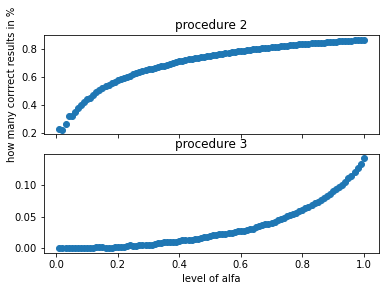

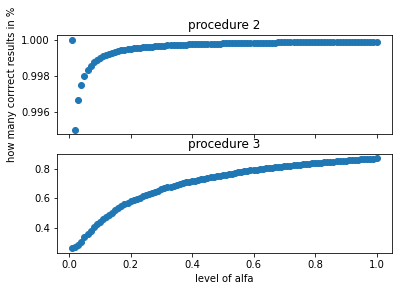

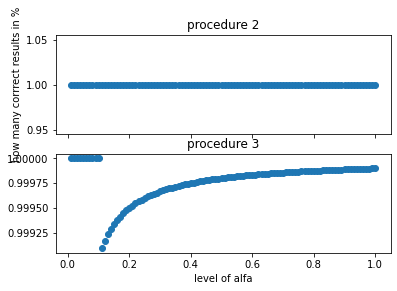

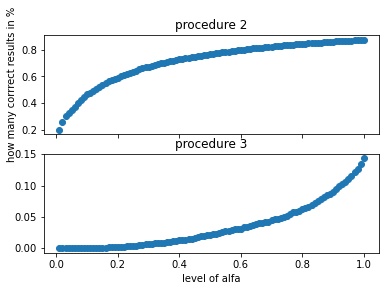

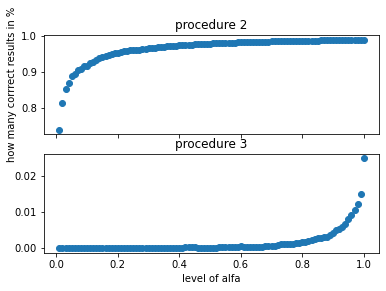

In [28]:
samplemean = [11,13,15,11,14]
popmean = [10,10,10,10,12]
diff_list = [12,12,12,12,16]
for k in range(5):
    sample_mean = samplemean[k] 
    pop_mean = popmean[k]
    diff = diff_list[k]
    correct = []
    alties = []
    alfas = []
    p_p   = 0
    m_m   = 0
    p_m   = 0
    m_p   = 0
    a_p_p = 0
    a_m_m = 0
    a_p_m = 0
    a_m_p = 0
    for alfa in range(1,101):
        alfa = alfa*0.01
        alfas.append(alfa)
        for i in range(1,101):
            sample = get_normal_sample(40,sample_mean,4)
            stand = t_test_for_one_group(sample,pop_mean,diff=0,alternative='greater')
            alt = t_test_for_one_group(sample,pop_mean,diff,'greater')
            if sample_mean > pop_mean:
                if stand < alfa:
                    p_p+=1
                elif stand >= alfa:
                    m_p +=1
            else:
                if stand < alfa:
                    m_m+=1
                else:
                    p_m +=1

            if sample_mean > diff:
                if alt < alfa:
                    a_p_p+=1
                elif alt >= alfa:
                    a_m_p +=1
            else:
                if alt < alfa:
                    a_m_m+=1
                else:
                    a_p_m +=1

        correct.append((p_p+m_m)/(p_p+m_m+p_m+m_p))
        alties.append((a_p_p+a_m_m)/(a_p_p+a_m_m+a_p_m+a_m_p))
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.set_title('procedure 2')
    ax2.set_title('procedure 3')
    ax2.set_xlabel("level of alfa")
    ax1.set_ylabel("how many corrrect results in %")
    ax1.scatter(alfas,correct)
    ax2.scatter(alfas,alties)
    #print(alfas)
    #print(correct)
    #print(alties)
    #print('test, rzeczywistość','\n',
    #      'p_p ', p_p, '\n',  
    #      'm_m ',m_m,  '\n',  
    #      'a_p_p ',a_p_p,'\n',
    #      'a_m_m ',a_m_m,'\n',    
    #      'p_m ',p_m,  '\n',  
    #      'm_p ',m_p,  '\n',  
    #      'a_p_m ',a_p_m,'\n',
    #      'a_m_p ',a_m_p,'\n',
    #      'correct: ', (p_p+m_m)/(p_p+m_m+p_m+m_p),'\n',
    #      'correct alt: ', (a_p_p+a_m_m)/(a_p_p+a_m_m+a_p_m+a_m_p))

In [9]:
def podejscie1(pop_mean,sample_size,sample_mean,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    mean = np.mean(sample)
    if mean > pop_mean+diff and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif mean > pop_mean+diff and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif mean <= pop_mean+diff and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif mean <= pop_mean+diff and sample_mean > pop_mean+diff:
        return '2t-er'

In [300]:
results = []
for j in range(10):
    for i in range(1000):
        results.append(podejscie1(18,20+j,20,3))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))

0
8894
1106
0


In [10]:
def podejscie2(pop_mean,sample_size,sample_mean,alfa,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    result = t_test_for_one_group(sample,pop_mean,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'

In [11]:
alfs = []
reslts = []
for alfa in range(1,101):
    p_s = []
    alfa = alfa*0.01
    for i in range(1,1001):
        p_s.append(podejscie3(0,50,2,alfa,diff = 4))
    reslts.append(len([j for j in p_s if j == 'p-cor' or j == 'n-cor']))
    alfs.append(alfa)
plt.scatter(alfs,reslts)
#print(p_s.count('p-cor'))
#print(p_s.count('n-cor'))
#print(p_s.count('1t-er'))
#print(p_s.count('2t-er'))

NameError: name 'podejscie3' is not defined

In [12]:
def podejscie3(pop_mean,sample_size,sample_mean,alfa,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    result = t_test_for_one_group(sample,pop_mean,diff=diff,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'

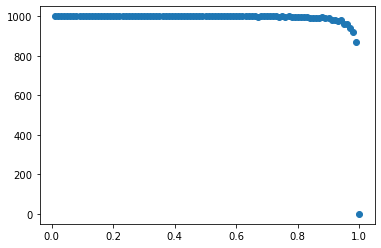

In [479]:
alfas = []
reslt = []
for alfa in range(1,101):
    a_p_s = []
    alfa = alfa*0.01
    for i in range(1,1001):
        a_p_s.append(podejscie3(0,50,2,alfa,diff = 4))
    reslt.append(len([j for j in a_p_s if j == 'p-cor' or j == 'n-cor']))
    alfas.append(alfa)
plt.scatter(alfas,reslt)
#print(a_p_s.count('p-cor'))
#print(a_p_s.count('n-cor'))
#print(a_p_s.count('1t-er'))
#print(a_p_s.count('2t-er'))

In [13]:
def dependent_1(sample_size1,sample_mean1,sample_size2,sample_mean2,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    
    if np.abs(mean1-mean2) > diff and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif np.abs(mean1-mean2) > diff and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif np.abs(mean1-mean2) <= diff and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif np.abs(mean1-mean2) <= diff and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [20]:
def dependent_2(sample_size1,sample_mean1,sample_size2,sample_mean2,alfa,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    #result = t_test_for_dependent_groups(sample1,sample2, alternative='greater')
    
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    res = sample1-sample2
    
    result = t_test_for_dependent_groups(res,diff,diff=0,alternative='greater')
    
    if result < alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif result < alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif result >= alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif result > alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [19]:
def dependent_3(sample_size1,sample_mean1,sample_size2,sample_mean2,alfa,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    #result = t_test_for_dependent_groups(sample1,sample2,diff = diff, alternative='greater')
    
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    res = sample1-sample2
    
    result = t_test_for_dependent_groups(res,diff,diff=2,alternative='greater')
    
    if result < alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif result < alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif result >= alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif result > alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [612]:
results = []
for j in range(10):
    for i in range(1000):
        results.append(dependent_1(50,18,50,10))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))

10000
0
0
0


In [623]:
reslts = []
for alfa in range(1000):
    alfa = alfa*0.001
    #for i in range(1000):
    reslts.append(dependent_2(50,12,50,10,alfa,diff=2))
print(reslts.count('p-cor'))
print(reslts.count('n-cor'))
print(reslts.count('1t-er'))
print(reslts.count('2t-er'))

0
497
503
0


In [625]:
a_reslts = []
alfas = []
for alfa in range(1000):
    alfa = alfa*0.001
    alfas.append(alfa)
    #for i in range(1000):
    a_reslts.append(dependent_3(50,14,50,10,alfa,diff=2))
print(a_reslts.count('p-cor'))
print(a_reslts.count('n-cor'))
print(a_reslts.count('1t-er'))
print(a_reslts.count('2t-er'))

511
0
0
489


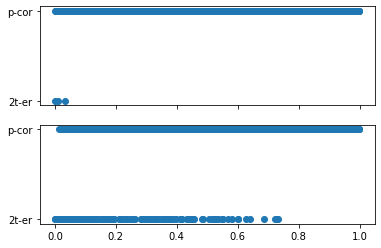

In [589]:
#fig, (ax1, ax2) = plt.subplots(2, sharex=True)
#ax1.scatter(alfas,reslts)
#ax2.scatter(alfas,a_reslts)


In [16]:
def independent_1(sample_size1,sample_mean1,sample_size2,sample_mean2,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    
    if np.abs(mean1-mean2) > diff and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif np.abs(mean1-mean2) > diff and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif np.abs(mean1-mean2) <= diff and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif np.abs(mean1-mean2) <= diff and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [17]:
def independent_2(sample_size1,sample_mean1,sample_size2,sample_mean2,alfa,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    result = t_test_for_independent_groups(sample1,sample2,diff = 0, alternative='greater')
    
    #sample1 = np.array(sample1)
    #sample2 = np.array(sample2)
    #res = sample1-sample2
    
    #result = t_test_for_one_group(res,diff,diff=2,alternative='greater')
    
    if result < alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif result < alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif result >= alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif result > alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [18]:
def independent_3(sample_size1,sample_mean1,sample_size2,sample_mean2,alfa,diff=0):
    sample1 = get_normal_sample(sample_size1,sample_mean1,4)
    sample2 = get_normal_sample(sample_size2,sample_mean2,4)
    result = t_test_for_independent_groups(sample1,sample2,diff = diff, alternative='greater')
    
    #sample1 = np.array(sample1)
    #sample2 = np.array(sample2)
    #res = sample1-sample2
    
    #result = t_test_for_one_group(res,diff,diff=2,alternative='greater')
    
    if result < alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return 'p-cor'
    elif result < alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return '1t-er'
    elif result >= alfa and np.abs(sample_mean1-sample_mean2) <= diff:
        return 'n-cor'
    elif result > alfa and np.abs(sample_mean1-sample_mean2) > diff:
        return '2t-er'

In [644]:
reslts = []
for alfa in range(1000):
    alfa = alfa*0.001
    #for i in range(1000):
    reslts.append(independent_2(30,13,30,10,alfa,diff=2))
print(reslts.count('p-cor'))
print(reslts.count('n-cor'))
print(reslts.count('1t-er'))
print(reslts.count('2t-er'))

981
0
0
19


In [643]:
reslts = []
for alfa in range(1000):
    alfa = alfa*0.001
    #for i in range(1000):
    reslts.append(independent_3(30,13,30,10,alfa,diff=2))
print(reslts.count('p-cor'))
print(reslts.count('n-cor'))
print(reslts.count('1t-er'))
print(reslts.count('2t-er'))

749
0
0
251
